<font size="5">**plot the tyre strategy**</font>

this code will generate the plot that shows the tyre strategies of all drivers in a race

first, all the necessary packages are imported

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import fastf1
import fastf1.plotting

In [2]:
year = 2023
race = "hungary"
session_name = "Race"

In [3]:
session = fastf1.get_session(year, race, session_name)
session.load(telemetry=True, laps=True, weather=True)

drivers = session.results.Abbreviation

compounds = {"SOFT": 'red', 
             "MEDIUM": 'yellow', 
             "HARD": 'white',
             "INTERMEDIATE": "lime",
             "WET": "blue"}

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\gakro\AppData\Local\Temp\fastf1.
	Size: 1.79 GB
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '44', '81', '63', '16', '55', '14', '18', '23', '77', '3', '27', '22', '24', '20', '2', '31', '10']


In [4]:
def tyre_strategy_visualization(session, drivers, compounds):    
    tyre_strategy = np.empty(len(drivers), object)
    for i in range(len(drivers)):
        session.laps.pick_driver(drivers[i]).columns
        sample = session.laps.pick_driver(drivers[i]).filter(['LapNumber','Stint','Compound', 'TyreLife', 'PitInTime'], axis=1)

        lap_prev = 0.0
        compound = session.laps.pick_driver(drivers[i]).Compound.iloc[0]
        stint_length = 1.0
    
        if len(session.laps.pick_driver(drivers[i])) == 1:
            data = [[1.0, 0.5, session.laps.pick_driver(drivers[i]).Compound.iloc[0]]]
            stint_df = pd.DataFrame(data, columns=['stint', 'stint length', 'compound'])

        else:
            stint_df = pd.DataFrame(columns=["stint", "stint length", "compound"])

        for index, row in sample.iterrows():
            compound = row["Compound"]
            stint = row["Stint"]
            if type(row["PitInTime"]) != type(pd.NaT):
                stint_length = row["LapNumber"] - lap_prev
                lap_prev = row["LapNumber"]
                stint_df.loc[len(stint_df)] = {"stint": stint, "stint length": stint_length, "compound": compound}
                stint_length = 0.0


            elif len(sample) == row["LapNumber"]:
                stint_length = row["LapNumber"] - lap_prev + 1
                lap_prev = row["LapNumber"]
                stint_df.loc[len(stint_df)] = {"stint": stint, "stint length": stint_length, "compound": compound}
                stint_length = 0.0
        tyre_strategy[i] = stint_df
        
    fig, ax = plt.subplots()
    for h in range(len(drivers)):
        x = [drivers[h]]
        y = None
        y_prev = None
        y_total = 0
        color = None

        compound = tyre_strategy[h]["compound"].iloc[0]
        color = compounds[compound]

        for i in range(len(tyre_strategy[h]["stint length"])):
            y = tyre_strategy[h]["stint length"].iloc[i]
            compound = tyre_strategy[h]["compound"].iloc[i]
            color = compounds[compound]

            if y_prev == None:
                ax.barh(x, y, color=color, edgecolor = "black", linewidth = 2)
                y_prev = y
            else:
                ax.barh(x, y, left=y_prev, color = color, edgecolor = "black", linewidth = 2)
                y_prev = y + y_prev

            y_total = y_total + y

        ax.set_facecolor("black")
        fig.set_dpi(1000)
        ax.set_facecolor("black")
    ax.invert_yaxis()

    plt.suptitle(f"Tyre Strategy Comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)
    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')
    
    plt.show()

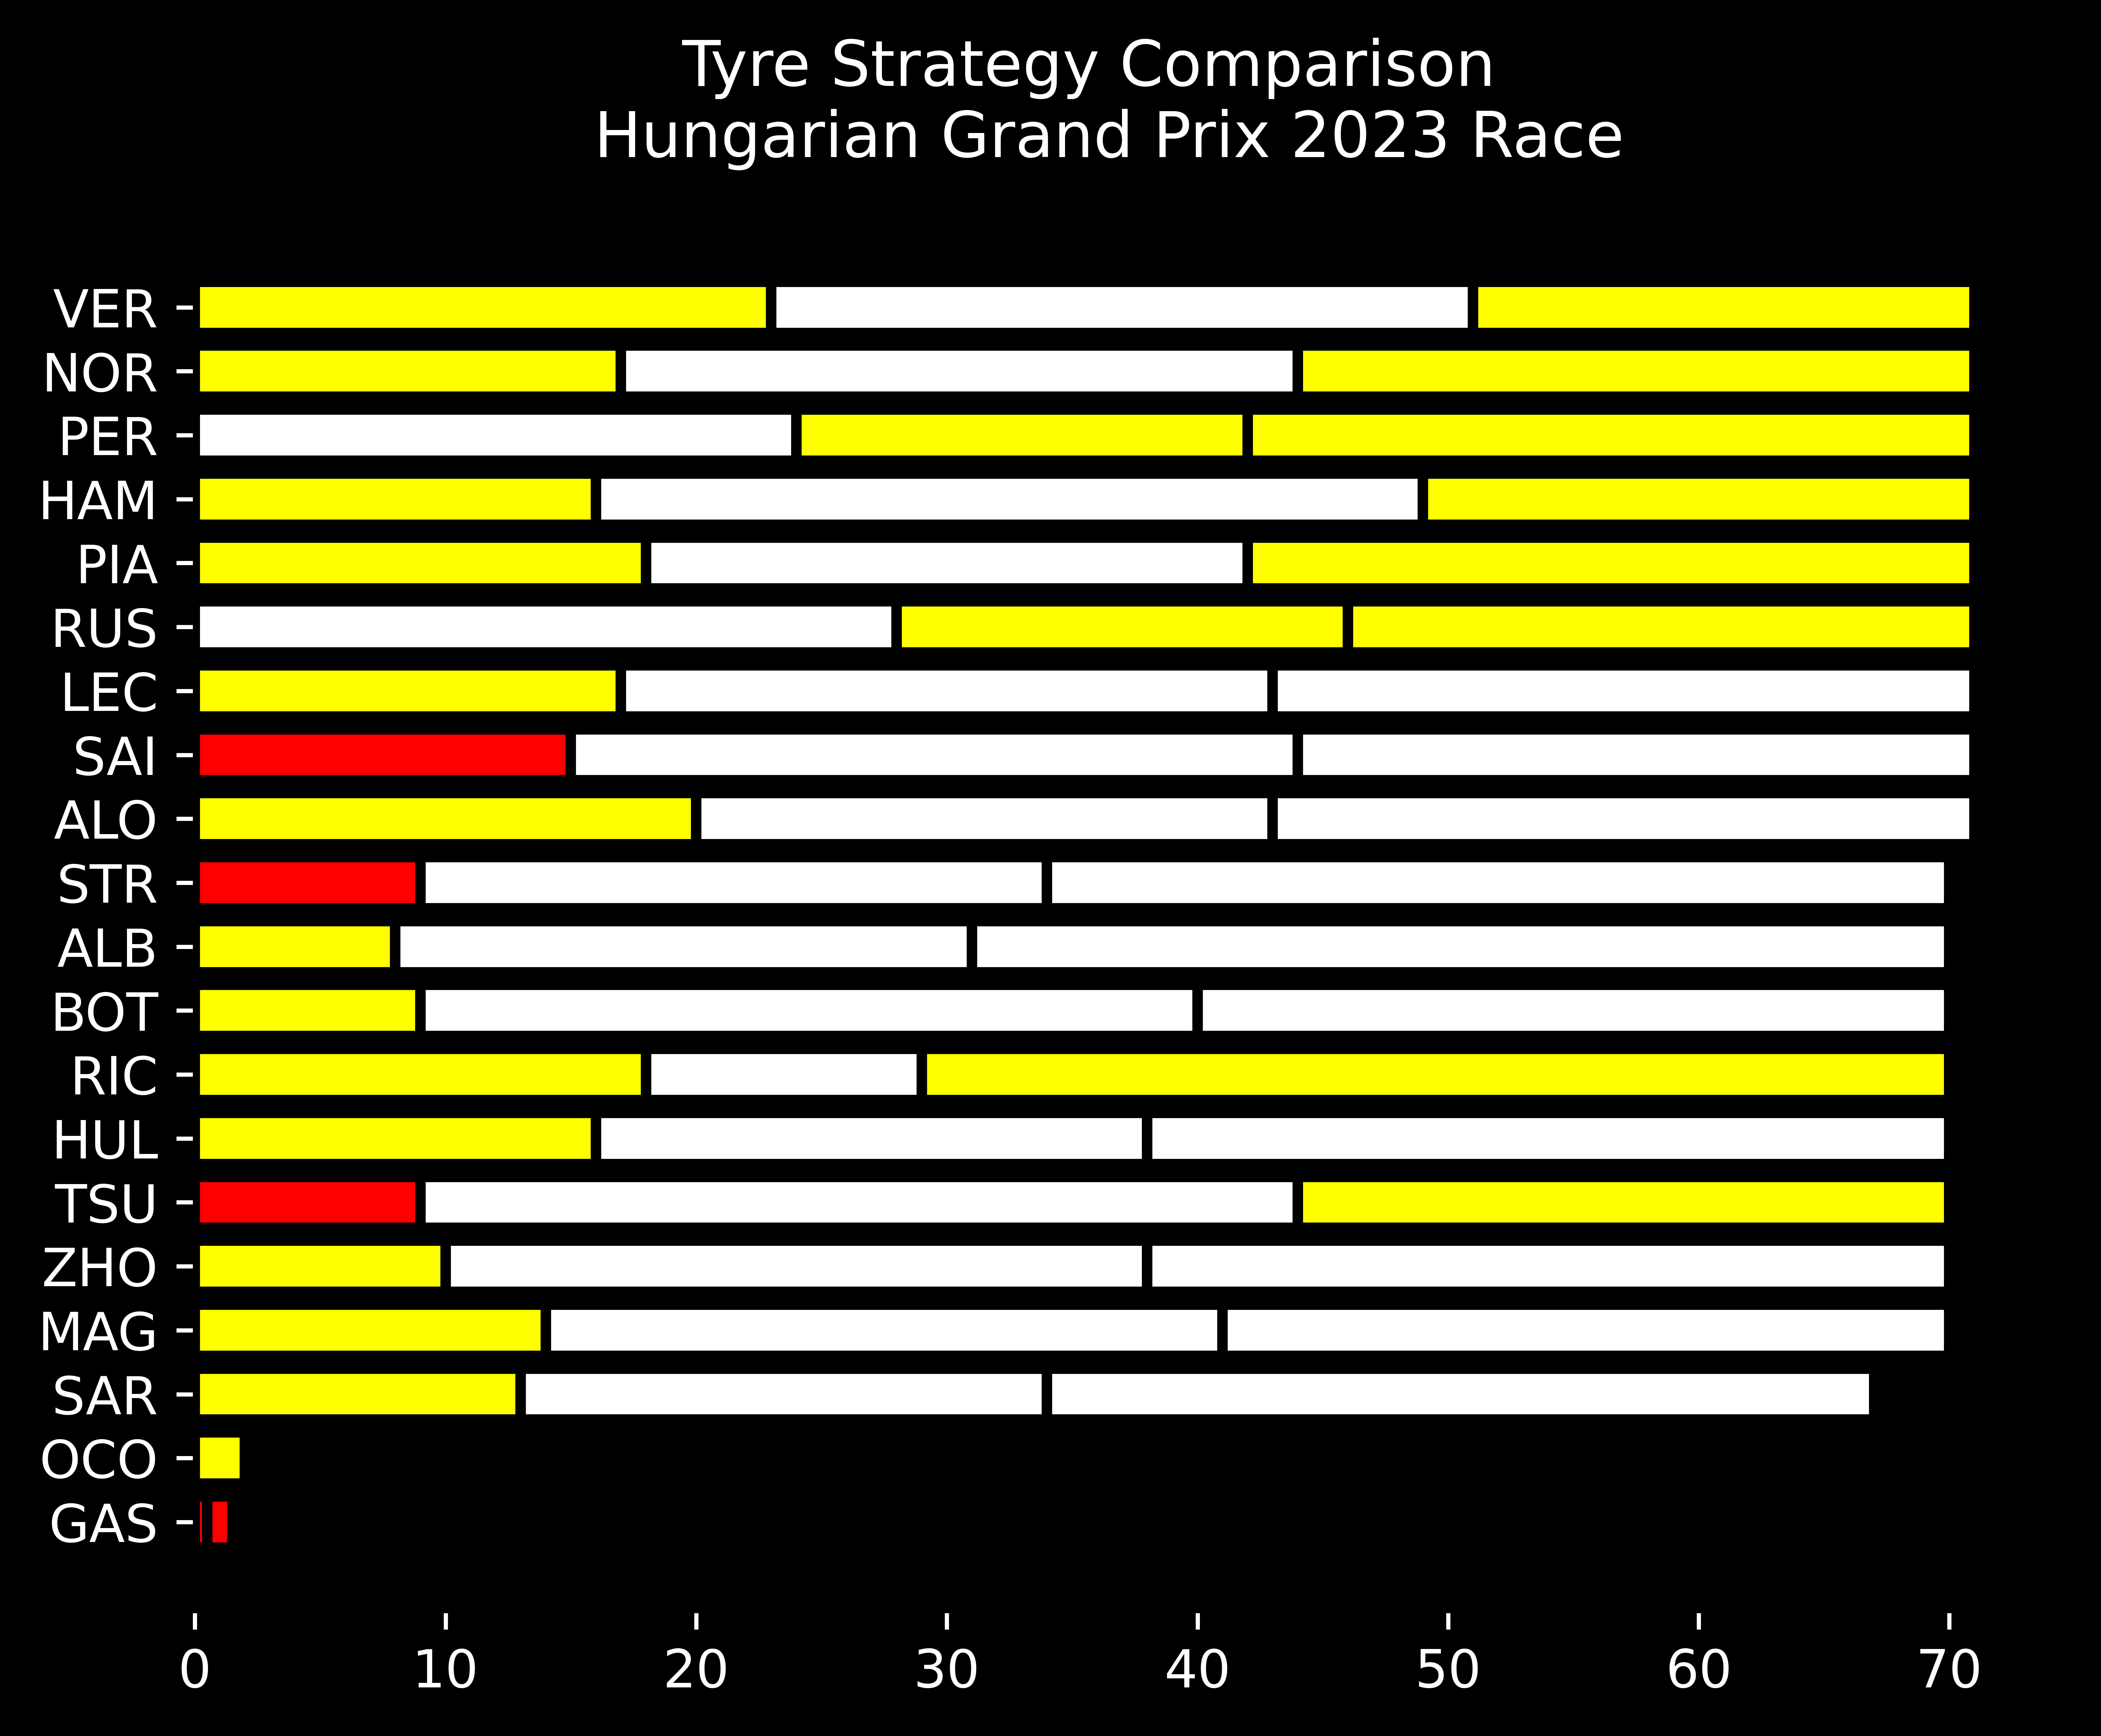

<Figure size 5e+06x5e+07 with 0 Axes>

In [6]:
tyre_strategy_visualization(session, drivers, compounds)